# Multi-Layer Perceptron (MLP)

In [1]:
# define plot decision regions for later use

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

<img src="MLP.png" alt="Alternative text" />


In [3]:
# Build the XOR from OR, NAND, AND gates
# using: from sklearn.linear_model import Perceptron

In [4]:
from sklearn.linear_model import Perceptron
import numpy as np

train_data = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])

train_data2 = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]*2)

target_xor = np.array(
    [
        0,
        1,
        1,
        0])

target_nand = np.array(
    [
        1,
        1,
        1,
        0])

target_nand2 = np.array(
    [
        1,
        1,
        1,
        0]*2)

target_or = np.array(
    [
        0,
        1,
        1,
        1])

target_and = np.array(
    [
        0,
        0,
        0,
        1])

def XOR():
    """
    Return the boolean XOR of x1 and x2
    """

    p_or = Perceptron()
    p_nand = Perceptron()
    p_and = Perceptron()

    p_or.fit(train_data, target_or)
    p_nand.fit(train_data2, target_nand2)
    p_and.fit(train_data, target_and)
    
    p_or_x = p_or.predict(train_data)
    print((p_or_x))
    p_nand_x = p_nand.predict(train_data)
    print(p_nand_x)
    
    result = np.column_stack((p_or_x, p_nand_x))
    print(result)
        
    p_xor_x = p_and.predict(result)
    print(p_xor_x)

    return p_xor_x

xor_result = XOR()
print(xor_result)

[0 1 1 1]
[1 1 1 0]
[[0 1]
 [1 1]
 [1 1]
 [1 0]]
[0 1 1 0]
[0 1 1 0]


In [5]:
# Build the XOR from OR, NAND, AND gates
# using: from sklearn.neural_network import MLPClassifier

In [6]:
import warnings
warnings.simplefilter("ignore")
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.], [0., 1.],  [1., 0.]]
y = [0, 0, 1, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2), random_state=100, activation='logistic', max_iter=200)
clf.fit(X, y)
print("------------------------------------------------------------")
print("Training loss = " + str(clf.loss_))
print()
print("Coefficients :")
print(clf.coefs_)
print()
print("Intercepts :")
print(clf.intercepts_)
print()
print("Predict for [[0., 0.], [1., 1.], [0., 1.],  [1., 0.]]")
print("Predicted value = "+ str(clf.predict([[0., 0.], [1., 1.], [0., 1.],  [1., 0.]])))
print("------------------------------------------------------------")

------------------------------------------------------------
Training loss = 0.001457990669101666

Coefficients :
[array([[ 7.32116118, 10.59218782],
       [-7.68301668, -6.87576244]]), array([[ 18.69889417],
       [-20.42881519]])]

Intercepts :
[array([-4.77108322,  3.6139551 ]), array([11.15727879])]

Predict for [[0., 0.], [1., 1.], [0., 1.],  [1., 0.]]
Predicted value = [0 0 1 1]
------------------------------------------------------------


In [7]:
# XOR Decision Boundry illustration

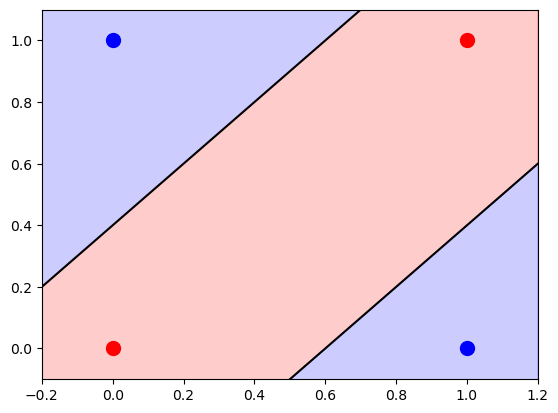

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

boundary1 = np.linspace(-.2,1.2,100)
plt.plot(boundary1,boundary1+0.4,c='black')
plt.plot(boundary1,boundary1-0.6,c='black')
plt.scatter(1,1,c='red',s=100)
plt.scatter(0,0,c='red',s=100)
plt.scatter(0,1,c='blue',s=100)
plt.scatter(1,0,c ='blue', s=100)
plt.fill_between(x=boundary1,y1=boundary1+.4,y2=boundary1+3,alpha=.2,color='blue')
plt.fill_between(x=boundary1,y1=boundary1-.6,y2=boundary1-2,alpha=.2,color='blue')
plt.fill_between(x=boundary1,y1=boundary1+.4,y2=boundary1-0.6,alpha=.2,color='red')
plt.xlim(-.2,1.2)
plt.ylim(-.1,1.1)
plt.show()

In [9]:
# Visualize the neural network

In [10]:
import pandas as pd
import VisualizeNN as VisNN 
#from palettable.colorbrewer.qualitative import Dark2_7

data = {'F1':[0,0,1,1], 'F2':[0,1,0,1], "Target":[0,1,1,0]} #XOR
df = pd.DataFrame(data) 

X_xor = df[["F1","F2"]]
y_xor = df["Target"].values.tolist()

df

,F1,F2,Target
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [11]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='relu', max_iter=10000, hidden_layer_sizes=(4,2), alpha = 0.1)

In [12]:
%time clf.fit(X_xor, y_xor)          

CPU times: user 226 ms, sys: 934 µs, total: 227 ms
Wall time: 226 ms


MLPClassifier(alpha=0.1, hidden_layer_sizes=(4, 2), max_iter=10000)

In [13]:
y_xor_hat = clf.predict(X_xor)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_xor, y_xor_hat))
print(confusion_matrix(y_xor, y_xor_hat))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

[[2 0]
 [1 1]]


In [15]:
clf.coefs_

[array([[-1.12940949e-02,  7.14041343e-01,  3.47985417e-01,
          8.79716793e-01],
        [ 1.33623685e-04,  6.40975526e-01,  4.98332014e-01,
         -8.79018547e-01]]),
 array([[ 0.11163687,  0.13890017],
        [-0.91269721,  0.30330044],
        [-0.43318617, -0.4898442 ],
        [ 1.39944676, -0.48850889]]),
 array([[ 1.52090786],
        [-1.40683639]])]

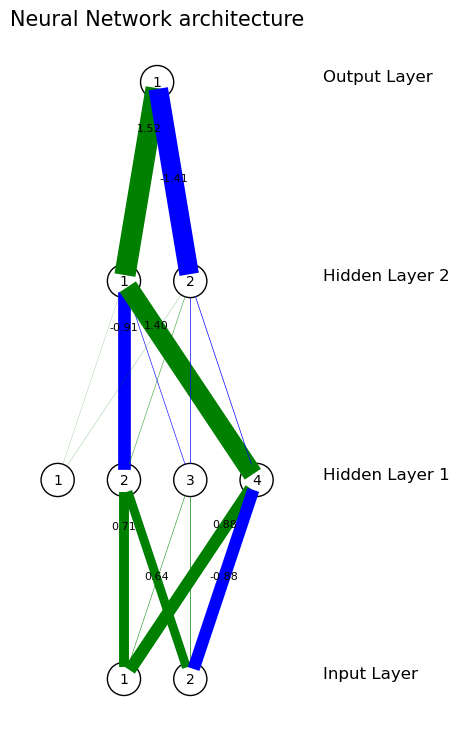

In [16]:
network=VisNN.DrawNN([2,4,2,1], clf.coefs_) # only abs(weight)>0.5 are shown
network.draw()

In [17]:
# Synthetic data, which is not linerarly seperaable, MLP classifier, different hidden layers

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

In [ ]:
# hidden layer: default, 1 layers, with 100 nodes

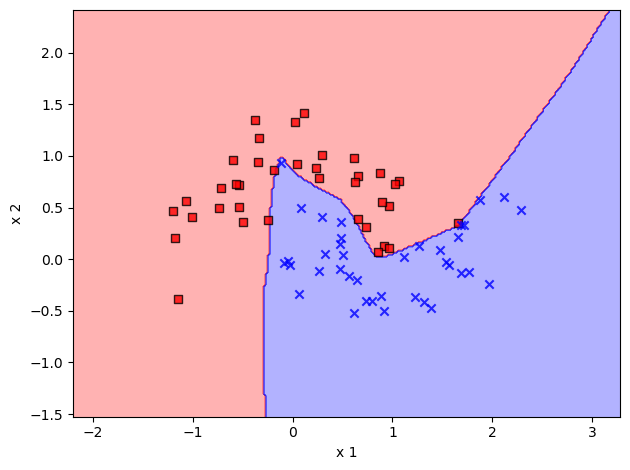

In [19]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

plot_decision_regions(X_train, y_train, 
                      classifier=mlp)
plt.xlabel("x 1")
plt.ylabel("x 2")
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()

In [ ]:
# hidden layer: 1 layers, with 10 nodes 

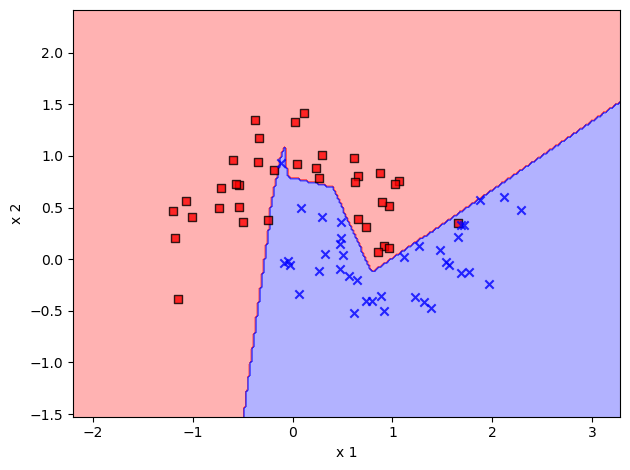

In [20]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(10)).fit(X_train, y_train)

plot_decision_regions(X_train, y_train, 
                      classifier=mlp)

plt.xlabel("x 1")
plt.ylabel("x 2")
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()

In [ ]:
# hidden layer: 2 layers, with 10 nodes each 

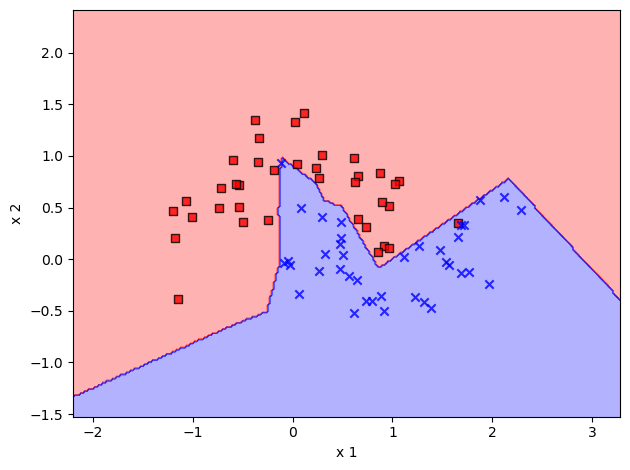

In [21]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(10,10)).fit(X_train, y_train)

plot_decision_regions(X_train, y_train, 
                      classifier=mlp)

plt.xlabel("x 1")
plt.ylabel("x 2")
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()